In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pylab as plt

import requests
from lxml import html

from BeautifulSoup import BeautifulSoup as BS
import urllib2
import re

import pandas as pd
import numpy as np
import string
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model as lm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import chisquare
import sklearn.metrics as metrics

# Data assembly

In [2]:
def years_2000_04(year,month,day,name,age):
    '''
    apply only to years 2000 - 2004 which have a different format on fiftiesweb.com

    '''
    year_list = {'2000':1,'2001':3,'2002':2,'2003':0,'2004':0}
    
    month_dict = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,
                  'APRIL':4,'MAY':5,'JUNE':6,
                  'JULY':7,'AUGUST':8,'SEPTEMBER':9,
                  'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12,
                  'January':1,'February':2,'March':3,
                  'April':4,'May':5,'June':6,
                  'July':7,'August':8,'September':9,
                  'October':10,'November':11,'December':12,
                  'Feb.':2}
    
    
    for i in sorted(year_list.keys()):
        year_j = i
        
        #access webpage and save HTML into python
        page = requests.get("http://fiftiesweb.com/dead/dead-people-{}/".format(i)).text
        soup = BS(page)

        #Loop celbs and save to dates to lists
        full_list = soup.findAll('p')[year_list[i]].text
        full_list = full_list.replace(" &#8211; "," ")
        full_list = full_list.replace(" &#8220;Pete&#8221; "," ")
        full_list = full_list.replace(" &#8220;Pat&#8221; "," ")
        full_list = full_list.replace(" &#8220;Deke&#8221; "," ")
        full_list = full_list.replace(" &#8220;Hucklebuck&#8221; "," ")
        full_list = full_list.replace(" &#8220;Spud&#8221; "," ")
        full_list = full_list.replace("&#8217;","")
        full_list = full_list.replace(", 2004","")
        split_list = re.split('(\d+)',full_list)[2:]
        
        #print i#,full_list
                 
        count = 0
        #'''
        for j in split_list[:-1]:
            #print j
            count = count + 1
            cut_list = string.split(j,' ')
            #print len(cut_list), cut_list
            
            if count % 2 == 0:
                day_j = cut_list[0]
                day.append(day_j)
                #print day_j
            else:
                if len(cut_list) > 3:
                    k = cut_list[-2]
                    month_b = k in month_dict.keys()
                    if (month_b == True):
                        month_j = month_dict[k]
                    #print month_j
                    celeb_j = str(cut_list[0])+' '+str(cut_list[1])
                    age_j = np.nan
                else:
                    celeb_j = np.nan
                    age_j = np.nan
                    
                #print year_j, month_j, celeb_j, age_j
                month.append(month_j)
                year.append(year_j)            
                name.append(celeb_j)
                age.append(age_j)    #'''
            
    return year,month,day,name,age

#lists
year = []
month = []
day = []
name = []
age = []

year,month,day,name,age = years_2000_04(year,month,day,name,age)

In [3]:
def years_2005_13(year,month,day,name,age):
    '''
    apply only to years 2005 to 2013 due to website format

    '''
    year_list = ['2005','2006','2007','2008','2009','2010','2011','2012']
    
    month_dict = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,
                  'APRIL':4,'MAY':5,'JUNE':6,
                  'JULY':7,'AUGUST':8,'SEPTEMBER':9,
                  'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12,
                  'January':1,'February':2,'March':3,
                  'April':4,'May':5,'June':6,
                  'July':7,'August':8,'September':9,
                  'October':10,'November':11,'December':12}
    
    for i in year_list:
        #print i
        #access webpage and save HTML into python
        page = requests.get("http://fiftiesweb.com/dead/dead-people-{}/".format(i)).text
        soup = BS(page)
    
        #Loop celbs and save to dates to lists
        elem_p = soup.findAll('p')[1:]
        elem = soup.findAll('b')[1:]
    
        for j in range(len(elem)):
            try:
                year_j = i
                celeb_j = elem[j].text[:-1]
                date_elem = str(elem_p[j].text[0:20])
                month_j = month_dict[string.split(date_elem,' ')[0]]
                day_j = string.split(date_elem,' ')[1]
                try:
                    day_j = string.split(day_j,'-')[0]
                except:
                    pass       
                
                try:
                    age_j = string.split(str(elem_p[j].text[-4:]),' ')[1]
                except:
                    age_j = 'nan'
                
                #print year_j, month_j, day_j, celeb_j, age_j
                year.append(year_j)
                month.append(month_j)
                day.append(day_j)
                name.append(celeb_j)
                age.append(age_j)
            except:
                pass
    return year,month,day,name,age

In [4]:
def years_2013_16(year,month,day,name,age):
    '''
    apply only to years 2013 to 2016 due to website format

    '''
    year_list = ['2013','2014','2015','2016']
    #year_list = ['2015']
    
    month_dict = {'JANUARY':1,'FEBRUARY':2,'MARCH':3,
               'APRIL':4,'MAY':5,'JUNE':6,
               'JULY':7,'AUGUST':8,'SEPTEMBER':9,
               'OCTOBER':10,'NOVEMBER':11,'DECEMBER':12,
               'January':1,'February':2,'March':3,
               'April':4,'May':5,'June':6,
               'July':7,'August':8,'September':9,
               'October':10,'November':11,'December':12,
                'October-':10,'November-':11,'December-':12,
                'Celebrity Deaths 2016JANUARY':1}
    
    for i in year_list:
        #print i
        #access webpage and save HTML into python
        page = requests.get("http://fiftiesweb.com/dead/dead-people-{}/".format(i)).text
        soup = BS(page)
    
        #Loop celbs and save to dates to lists
        elem_p = soup.findAll('p')[1:]
        elem = soup.findAll('b')
        #print elem_p
        
    
        for j in range(len(elem_p)):
            year_j = i
            try:
                k = str(elem_p[j].text[0:30])
                month_b = k in month_dict.keys()
                if (month_b == True):
                    month_j = month_dict[k]
                else:
                    if (elem_p[j].text[0] == '0'):
                        day_j = elem_p[j].text[1]
                    else:
                        day_j = elem_p[j].text[0:2]

                name_elem_b = str(string.split(k,',')[0])
                celeb_j = string.split(name_elem_b,';')[1]

                try:
                    age_j = string.split(str(elem_p[j].text[-4:]),' ')[1]
                except:
                    age_j = 'nan'

                
                #print year_j, month_j, day_j, celeb_j
                year.append(year_j)
                month.append(month_j)
                day.append(day_j)
                name.append(celeb_j)
                age.append(age_j)
            except:
                pass

    return year,month,day,name,age



In [5]:
#lists
year = []
month = []
day = []
name = []
age = []


year,month,day,name,age = years_2000_04(year,month,day,name,age)      
year,month,day,name,age = years_2005_13(year,month,day,name,age)
year,month,day,name,age = years_2013_16(year,month,day,name,age)

In [6]:
print 'year:',len(year),' month:',len(month),' day:',len(day),' age:',len(age)

year: 1227  month: 1227  day: 1227  age: 1227


In [7]:
#Build data frame
def func(x):
    try:
        x = int(x)
    except:
        x = 'nan'
    return x

year = map(lambda x: func(x),year)
month = map(lambda x: func(x),month)
day = map(lambda x: func(x),day)
age = map(lambda x: func(x),age)

dict = {'year':year,
        'month':month,
        'day':day,
        'name':name,
        'age':age}

df = pd.DataFrame(data=dict)
print len(df)
df  = df.drop(df.day[df.day == 'nan'].index)
#df.to_csv('data/dead_celebs_2013_16.csv')
print len(df)
#df

1227
1223


# Analysis and visualise

In [8]:
counts = []
dates = []
dates_2 = []
#months_2 = []
#years_2 = []

years = df.year.unique()
months = sorted(df.month.unique())

c = 0 

for i in years:
    dg = df.groupby('year').get_group(i)
    for j in months:
        #print j
        try:
            dh = dg.groupby('month').get_group(j)
            l = len(dh)
        except:
            l = 0
        #print "{}-{}".format(i,j)
        counts.append(l)
        dates.append("{}-{}".format(i,j))
        #months_2.append(j)
        #years_2.append(i)
        if (c%10 == 0):
            dates_2.append("{}-{}".format(i,j))
        else:
            dates_2.append(" ")
        c = c+1
        #counts["{}-{}".format(i,j)] = len(dh)

dict = {'dates':dates,
        'count':counts}

df_counts = pd.DataFrame(data=dict)
df_counts.set_index(pd.DatetimeIndex(df_counts['dates']),inplace=True)
df_counts.fillna(0,inplace=True)
del df_counts['dates']

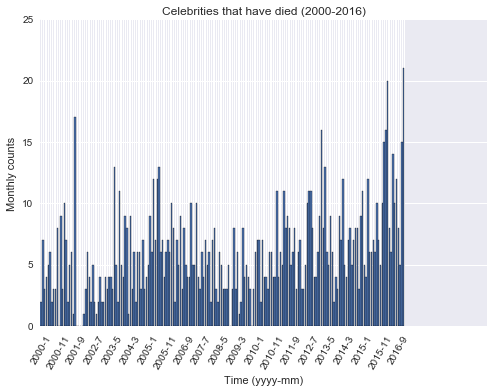

In [9]:
plt.figure()

N = len(counts)
ind = np.arange(N)
w = 0.35

x = dates_2

plt.bar(ind,df_counts['count'])

plt.title('Celebrities that have died (2000-2016)')
plt.ylabel('Monthly counts')
plt.xlabel('Time (yyyy-mm)')
plt.xticks()
plt.xticks(ind+w,x,rotation=60)

plt.show()

plt.savefig("plots/time_series_2000_2016.pdf")

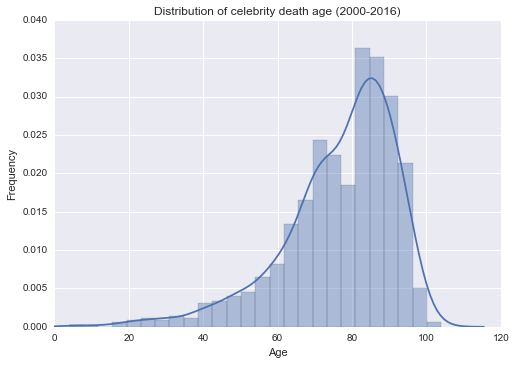

In [10]:
#plt.figure()
df_crop_age  = df.drop(df.age[df.age == 'nan'].index)
#df_crop_age.age.hist(bins=30)
#print df_crop_age.age.median(),df_crop_age.age.std()
sns.distplot(df_crop_age.age)
plt.title('Distribution of celebrity death age (2000-2016)')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.xlim([0,120])

plt.savefig("plots/death_age_distribution_2000_2016.pdf")

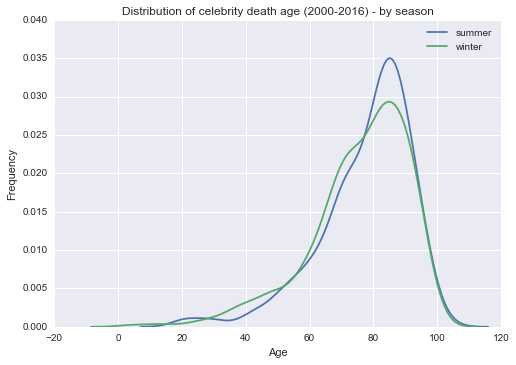

In [11]:
df_summer = df_crop_age.loc[df['month'].isin([4,5,6,7,8,9])]
df_winter = df_crop_age.loc[df['month'].isin([1,2,3,10,11,12])]

sns.kdeplot(df_summer.age,label='summer')
sns.kdeplot(df_winter.age,label='winter')

plt.title('Distribution of celebrity death age (2000-2016) - by season')
plt.ylabel('Frequency')
plt.xlabel('Age')

#sns.violinplot(df_crop_age.age)#, df_winter.age])

# Forecasting

In [12]:
def forecast_DF(n):
    '''
    Create a forecast dataframe of n years in the future.
    input:
    n - number of years
    output:
    df - dataframe
    '''
    #Create foreacast dataframe
    years = ['2017','2018','2019','2020','2021','2022','2023','2024',
             '2025','2026','2027','2028','2029','2030','2031','2032',
             '2033','2034','2035','2036','2037','2038','2039','2040']
    years = years[:n]
     
    dates = []
    
    for i in years:
        for j in months:
            dates.append("{}-{}".format(i,j))
         
    dict = {'dates':dates}

    df = pd.DataFrame(data=dict)
    df.set_index(pd.DatetimeIndex(df['dates']),inplace=True)

    del df['dates']
    return df

C:\Users\Damian\Anaconda2\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


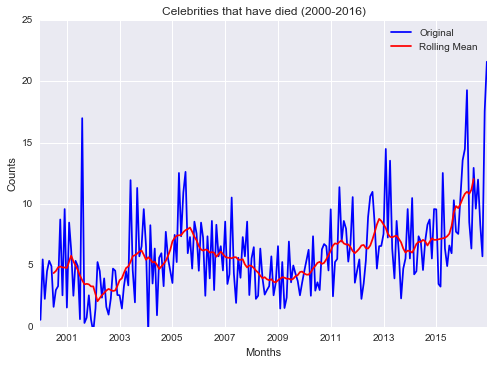

In [13]:
#Seasonal decomposition
TS = df_counts
decomposition = seasonal_decompose(TS, freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

reduced=TS-seasonal

#Plot rolling statistics:
orig = plt.plot(reduced, color='blue',label='Original')
mean = plt.plot(trend, color='red', label='Rolling Mean')
#reduced = plt.plot(reduced, color='green', label='Reduced')

plt.title('Celebrities that have died (2000-2016)')
plt.ylabel('Counts')
plt.xlabel('Months')
plt.legend()
plt.ylim([0,25])

plt.savefig("plots/time_series_rolling_mean_2000_2016.pdf")

In [14]:
def ARIMA_model(p,d,q,TS):
    '''
    This function runs the ARIMA modelling alg.
    Input:
    p,d,q parameters (int)
    TS (the time series to be modelled, ideally seasonality reduced)
    Output:
    result function
    '''
    model = ARIMA(TS, order=(p,d,q))  
    results_AR = model.fit(disp=0)  

    return results_AR
    

In [15]:
def forecast_PLOT(year,colour,ARIMA):
    '''
    Plotting script
    input:
    year - string
    colour - string
    ARIMA - ARIMA result function
    
    '''
    plt.plot(df_forecast['forecast {}'.format(year)], color=colour,
             label='{} forecast RSS: {}'.format(year,int(sum((ARIMA.resid)**2))))
    plt.fill_between(df_forecast['forecast {}'.format(year)].index,
                     df_forecast['forecast {}'.format(year)]+df_forecast['stderr forecast {}'.format(year)],
                     df_forecast['forecast {}'.format(year)]-df_forecast['stderr forecast {}'.format(year)],
                     facecolor=colour,alpha=0.5)
    return

def forecast_composite_PLOT(year,colour,ARIMA):
    '''
    Plotting script
    input:
    year - string
    colour - string
    ARIMA - ARIMA result function
    
    '''
    plt.plot(df_forecast['composit forecast {}'.format(year)], color=colour,
             label='{} forecast RSS: {}'.format(year,int(sum((ARIMA.resid)**2))))
    plt.fill_between(df_forecast['composit forecast {}'.format(year)].index,
                     df_forecast['composit forecast {}'.format(year)]+df_forecast['stderr forecast {}'.format(year)],
                     df_forecast['composit forecast {}'.format(year)]-df_forecast['stderr forecast {}'.format(year)],
                     facecolor=colour,alpha=0.5)
    return

<function matplotlib.pyplot.show>

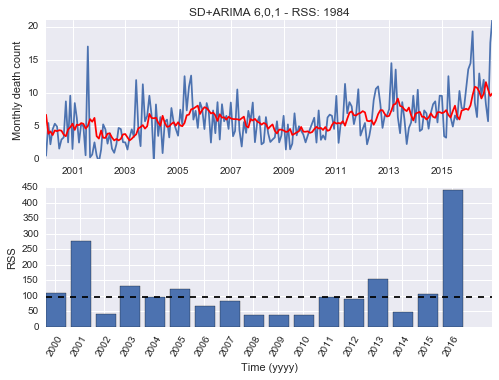

In [16]:
#ARIMA
reduced=TS-seasonal
reduced.dropna(inplace=True)

p,d,q = [6,0,1]
AR_full = ARIMA_model(p,d,q,reduced)

plt.subplot(2,1,1)
plt.plot(reduced)
plt.plot(AR_full.fittedvalues, color='red')
plt.title('SD+ARIMA {},{},{} - RSS: {}'.format(p,d,q,int(sum((AR_full.resid)**2))))
plt.ylim([0,21])
plt.ylabel('Monthly death count')
#'''
plt.subplot(2,1,2)

R_2_year = []
year_list = ['2000','2001','2002','2003',
             '2004','2005','2006','2007',
             '2008','2009','2010','2011',
             '2012','2013','2014','2015',
             '2016']
for i in year_list:
    R_2 = sum((AR_full.resid[i])**2)
    #print i,R_2
    R_2_year.append(R_2)

ind = np.arange(len(R_2_year))
w = 0.35

plt.bar(ind,R_2_year)

plt.ylabel('RSS')
plt.xlabel('Time (yyyy)')
plt.xticks()
plt.xticks(ind+w,year_list,rotation=60)  
plt.axhline(y=np.median(R_2_year),color='k',linestyle='--')
#'''
plt.savefig("plots/ARIMA_model_2000_2016.png")

plt.show

In [17]:
#Validation
test = reduced['2015']
predict = reduced['2016']

#Run model
p,d,q = [4,0,0] # 2016 & 2015
AR_2015 = ARIMA_model(p,d,q,test)  
AR_2016 = ARIMA_model(p,d,q,predict)

#Make predictions for 12 months
m = 12
forecast_2015 = AR_2015.forecast(m)
forecast_2016 = AR_2016.forecast(m)
#Build DataFrame
test['forecast']=pd.Series(forecast_2015[0],index=test.index)
predict['forecast 2015']=pd.Series(forecast_2015[0],index=predict.index)
predict['forecast 2016']=pd.Series(forecast_2016[0],index=predict.index)
#Validate
score_val = metrics.mean_squared_error(test['count'], test['forecast'])
print 'validate 2015:',score_val
score_val = metrics.mean_squared_error(test['count'], predict['forecast 2016'])
print 'validate 2016:',score_val
score_val = metrics.mean_squared_error(predict['count'], predict['forecast 2015'])
print 'predict 2016:',score_val


validate 2015: 9.67373962333
validate 2016: 25.0835725701
predict 2016: 52.7919987251


C:\Users\Damian\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Damian\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Damian\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

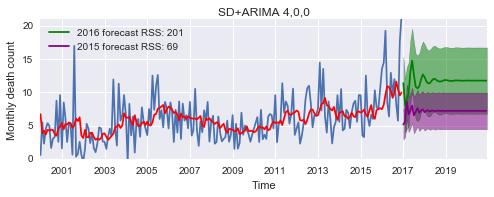

In [18]:
#Extended predictions - run predictions from 2015 and 2016 to examine the impact 2016 has on the forecast
test = reduced['2015']
predict = reduced['2016']

#Run model
p,d,q = [4,0,0] # 2016 & 2015
AR_2015 = ARIMA_model(p,d,q,test)  
AR_2016 = ARIMA_model(p,d,q,predict)

#Make predictions for n years
projection = 4
m = projection*12

forecast_2015 = AR_2015.forecast(m)
forecast_2016 = AR_2016.forecast(m)

#Build DataFrame
df_forecast = forecast_DF(projection)
df_forecast['forecast 2015']=pd.Series(forecast_2015[0],index=df_forecast.index)
df_forecast['forecast 2016']=pd.Series(forecast_2016[0],index=df_forecast.index)
df_forecast['stderr forecast 2015']=pd.Series(forecast_2015[1],index=df_forecast.index)
df_forecast['stderr forecast 2016']=pd.Series(forecast_2016[1],index=df_forecast.index)


plt.subplot(2,1,1)
plt.plot(reduced)
plt.plot(AR_full.fittedvalues, color='red')
forecast_PLOT('2016','green',AR_2016)
forecast_PLOT('2015','purple',AR_2015)

#plt.plot(df_forecast['linear forecast 2015'])

plt.title('SD+ARIMA {},{},{}'.format(p,d,q))
plt.legend(loc=2)
plt.ylim([0,21])
plt.ylabel('Monthly death count')
plt.xlabel('Time')

plt.savefig("plots/ARIMA_forecast_{}yrs.png".format(projection))


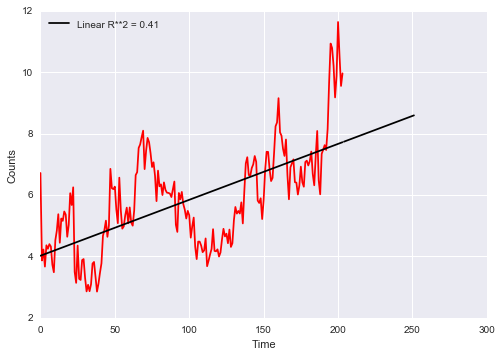

In [19]:
def linear_regression_PLOT(df,df_forecast):
    '''
    Plot a weighted linear regression across a give data frame df
    '''
    x = df.index
    y = df.values

    length = len(x)
    forecast_length = len(df_forecast)
    x = np.arange(length)
    x = x.reshape(length, 1)
    x_f = np.arange(forecast_length)
    x_f = x_f.reshape(forecast_length, 1)
    y = y.reshape(length, 1)
    forecast_x = map(lambda x:x+length,x_f)

    regr = lm.LinearRegression()
    regr.fit(x, y)
    py = regr.predict(x)
    py_forecast = regr.predict(forecast_x)
    score_val = regr.score(x, y)
    chi_score, pval = chisquare(y, py)

    plt.errorbar(x, y,xerr=0,yerr=0,fmt='{}'.format('r'))
    plt.plot(x,py,color='k',label='Linear R**2 = {}'.format(round(score_val,2)))
    plt.plot(forecast_x,py_forecast,color='k')
    plt.legend(loc=2)
    plt.xlabel('Time')
    plt.ylabel('Counts')
    return x,y,py,py_forecast

x,y,py,py_forecast = linear_regression_PLOT(AR_full.fittedvalues['2000':'2016'],df_forecast) 




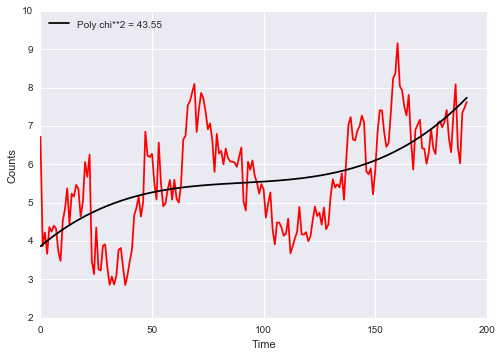

In [20]:

def Polyfit_PLOT(df,deg_val):
    '''
    Plot a weighted linear regression across a give data frame df
    '''
    length = len(df)
    x = np.arange(length)
    y = df.values

    polyz = np.polyfit(x,y,deg=deg_val)
    p = np.poly1d(polyz)
    xp = np.linspace(min(x), max(x), len(x))
    py = p(xp)
    
    chi_score, pval = chisquare(y, py)

    plt.errorbar(x, y,xerr=0,yerr=0,fmt='{}'.format('r'))
    plt.plot(x,py,color='k',label='Poly chi**2 = {}'.format(round(chi_score,2)))
    #plt.plot(forecast_x,py_forecast,color='k')
    plt.legend(loc=2)
    plt.xlabel('Time')
    plt.ylabel('Counts')
    return x,y,py#,py_forecast

x,y,py = Polyfit_PLOT(AR_full.fittedvalues['2000':'2015'],3)

#x,y,py,py_forecast = linear_regression_PLOT(AR_full.fittedvalues['2000':'2016'],df_forecast) 


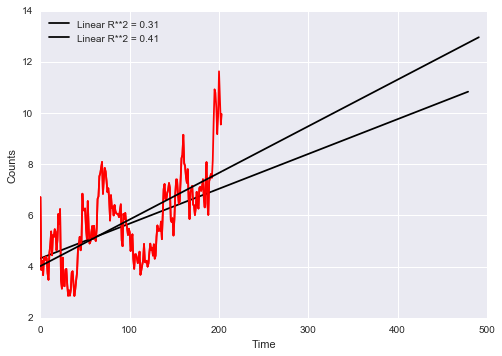

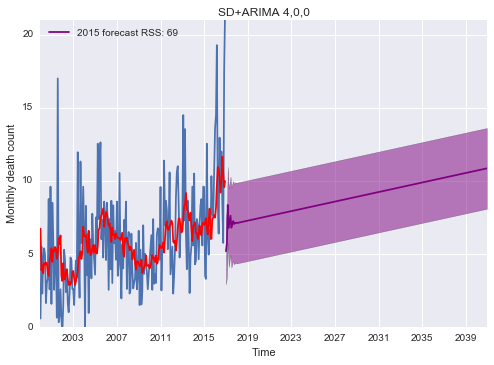

In [25]:
def composite_line(forecast1,forecast2,n,l):
    '''
    merger of two line forecast
    #Include composit line - up till n years (out of l total)
    '''
    partition = np.arange(n*12)
    partition_list = [float(i)/float(len(partition)) for i in partition]+np.ones((l-n)*12).tolist()

    partition1 = [i*(1.-j) for i,j in zip(forecast1,partition_list)]
    partition2 = [i*j for i,j in zip(forecast2,partition_list)]
    composit = [i+j for i,j in zip(partition1,partition2)]

    return composit 

#Extended predictions - run predictions from 2015 and 2016 to examine the impact 2016 has on the forecast
test = reduced['2015']
predict = reduced['2016']

#Run model
p,d,q = [4,0,0] # 2016 & 2015
AR_2015 = ARIMA_model(p,d,q,test)  
AR_2016 = ARIMA_model(p,d,q,predict)

#Make predictions for n years
projection = 24
m = projection*12

forecast_2015 = AR_2015.forecast(m)
forecast_2016 = AR_2016.forecast(m)

#Build DataFrame
df_forecast = forecast_DF(projection)
df_forecast['forecast 2015']=pd.Series(forecast_2015[0],index=df_forecast.index)
df_forecast['forecast 2016']=pd.Series(forecast_2016[0],index=df_forecast.index)
df_forecast['stderr forecast 2015']=pd.Series(forecast_2015[1],index=df_forecast.index)
df_forecast['stderr forecast 2016']=pd.Series(forecast_2016[1],index=df_forecast.index)

#regr, x = linear_regression_PLOT(AR_full.fittedvalues,df_forecast) 
x1,y1,py1,py_forecast1 = linear_regression_PLOT(AR_full.fittedvalues['2000':'2015'],df_forecast) 
x2,y2,py2,py_forecast2 = linear_regression_PLOT(AR_full.fittedvalues['2000':'2016'],df_forecast)

#Inclue linear projection of two s
length = len(py_forecast1)
py_forecast1 = py_forecast1.reshape(1,length)
py_forecast2 = py_forecast2.reshape(1,length)

df_forecast['linear forecast 2015']=pd.Series(py_forecast1[0],index=df_forecast.index)
df_forecast['linear forecast 2016']=pd.Series(py_forecast2[0],index=df_forecast.index)

#Include composite line
composit_2015 = composite_line(forecast_2015[0],py_forecast1[0],1,24)
composit_2016 = composite_line(forecast_2016[0],py_forecast2[0],16,24)
df_forecast['composit forecast 2015']=pd.Series(composit_2015,index=df_forecast.index)
df_forecast['composit forecast 2016']=pd.Series(composit_2016,index=df_forecast.index)


plt.figure()
plt.plot(reduced)
plt.plot(AR_full.fittedvalues, color='red')
#forecast_PLOT('2016','green',AR_2016)
forecast_composite_PLOT('2015','purple',AR_2015)

#plt.plot(df_forecast['linear forecast 2015'])

plt.title('SD+ARIMA {},{},{}'.format(p,d,q))
plt.legend(loc=2)
plt.ylim([0,21])
plt.ylabel('Monthly death count')
plt.xlabel('Time')

plt.savefig("plots/ARIMA_forecast_{}yrs.png".format(projection))


In [22]:
partition = np.arange(4*12)
partition_list = [float(i)/float(len(partition)) for i in partition]+np.ones(20*12).tolist()

AR_for = forecast_2015[0]
lin_for = py_forecast1[0]

AR_partition = [i*(1.-j) for i,j in zip(AR_for,partition_list)]
Lin_partition = [i*j for i,j in zip(lin_for,partition_list)]
composit = [i+j for i,j in zip(AR_partition,Lin_partition)]
#composit

In [30]:
a = df_forecast['composit forecast 2015']['2032'][0]
b = df_forecast['composit forecast 2015']['2032'][11]

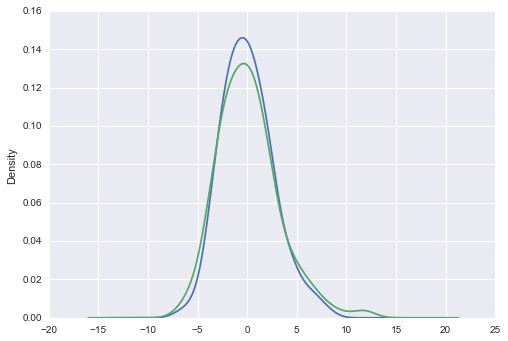

In [95]:
results_AR.resid['2002':'2015'].plot(kind='kde')
results_AR.resid.plot(kind='kde')

In [15]:
order_list = 50
best_Chi2 = 10000

for i in range(order_list):
    chi_score = W_Polyfit_PLOT(AR_fit,i,'FASLE')
    if (np.abs(chi_score) < best_Chi2):
        best_Chi2 = chi_score
        print "Degree {} has Chi2 of {}".format(i,int(best_Chi2))

NameError: name 'W_Polyfit_PLOT' is not defined

In [ ]:
chi_score = W_Polyfit_PLOT(AR_fit,42,'TRUE')

In [35]:
results_AR.resid['2002']

2002-01-01   -3.568953
2002-02-01   -2.864498
2002-03-01    2.005902
2002-04-01    1.295641
2002-05-01   -1.506722
2002-06-01    0.030218
2002-07-01   -1.675897
2002-08-01   -1.867281
2002-09-01   -0.765299
2002-10-01    1.873948
2002-11-01    1.471777
2002-12-01   -1.177243
dtype: float64

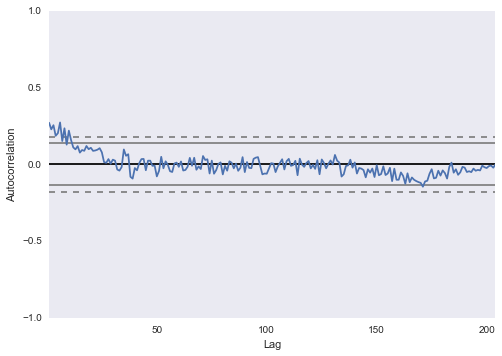

In [20]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(TS)

In [397]:
#Wikipidia version (more difficult)
html = urllib2.urlopen("https://en.wikipedia.org/wiki/Deaths_in_2016")
soup = BS(html)
elem = soup.findAll('li')
print elem[33].text

February
